In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [45]:
data = pd.read_csv('C:/Users/Mother/Downloads/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<function matplotlib.pyplot.show(*args, **kw)>

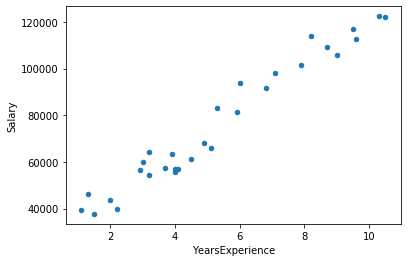

In [46]:
data.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.show

In [47]:
#data.describe()
#data.info()

# Drop null values
data = data.dropna()
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [48]:
X = data['YearsExperience']
Y = data['Salary']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [70]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

In [71]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]
print(len(X_test))

9


In [79]:
model = linear_model.LinearRegression()
#model.fit(X_train, y_train)
model.fit(data[['YearsExperience']], data.Salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [9449.96232146]
Intercept:  25792.20019866871


In [86]:
# Predicting the Salary for the Test values
y_pred = model.predict(X_test)
model.predict([[12]])

array([139191.74805613])

In [85]:

9449.96232146*12+25792.20019866871

139191.7480561887

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))

Mean Absolute Error:  4265.183036535498
Mean Squared Error:  22834828.164295983
R2 Score:  0.9719497271365424


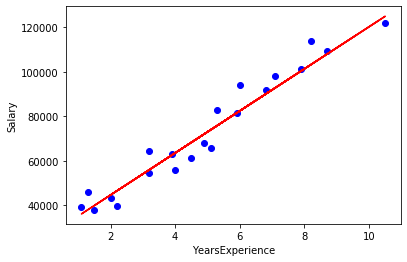

In [88]:
plt.scatter(X_train, y_train, color='b')
plt.plot(X_test, y_pred, color='r')
plt.plot(X_train, model.predict(X_train), color='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [89]:
train_pred = model.predict(data[['YearsExperience']])

In [90]:
data['Prediction'] = train_pred
data

,YearsExperience,Salary,Prediction
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [92]:
data.to_csv('C:/Users/Mother/Downloads/Salary_Data.csv', index=False)